# Exercises for Section 3.1 Estimates and estimators

This notebook contains the solutions to the exercises
from [Section 3.1 Estimates and estimators]()
in the **No Bullshit Guide to Statistics**.

### Notebooks setup

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Pandas setup
pd.set_option("display.precision", 2)

In [3]:
# Plot helper functions
from plot_helpers import savefigure

In [4]:
# Figures setup
plt.clf()  # needed otherwise `sns.set_theme` doesn't work
from plot_helpers import RCPARAMS
RCPARAMS.update({'figure.figsize': (5, 1.6)})  # good for print
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc=RCPARAMS,
)

# Useful colors
snspal = sns.color_palette()
blue, orange, purple = snspal[0], snspal[1], snspal[4]

# High-resolution please
%config InlineBackend.figure_format = 'retina'

# Where to store figures
DESTDIR = "figures/stats/estimators"

<Figure size 640x480 with 0 Axes>

### Estimator functions defined in Section 3.1

In [5]:
def mean(sample):
    return sum(sample) / len(sample)

def var(sample):
    xbar = mean(sample)
    sumsqdevs = sum([(xi-xbar)**2 for xi in sample])
    return sumsqdevs / (len(sample)-1)

def std(sample):
    s2 = var(sample)
    return np.sqrt(s2)

def dmeans(xsample, ysample):
    dhat = mean(xsample) - mean(ysample)
    return dhat

## Exercises 1


### Exercise 3.1

Compute the sample mean from Batch 01 and Batch 04 of the kombucha dataset `datasets/kombucha.csv` .

In [6]:
kombucha = pd.read_csv("datasets/kombucha.csv")
ksample01 = kombucha[kombucha["batch"]==1]["volume"]
mean(ksample01)

999.10375

In [7]:
ksample04 = kombucha[kombucha["batch"]==4]["volume"]
mean(ksample04)

1003.8335

### Exercise 3.2

Compute the sample variance from Batch 02 and Batch 08 of the kombucha dataset `datasets/kombucha.csv`.

In [8]:
kombucha = pd.read_csv("datasets/kombucha.csv")
ksample02 = kombucha[kombucha["batch"]==2]["volume"]
var(ksample02)

124.31760105263136

In [9]:
ksample08 = kombucha[kombucha["batch"]==8]["volume"]
var(ksample08)

169.9979220512824

### Exercise 3.3

Compute the difference between the means of the sleep `score` s 
for the doctors working in `rural` locations and `urban` locations
in the doctors dataset `datasets/doctors.csv` .

Hint: Use the code `doctors[doctors["location"]=="rural"]` to select
the subset of the doctors working in a `rural` location.

In [10]:
doctors = pd.read_csv("datasets/doctors.csv")
scoresR = doctors[doctors["location"]=="rural"]["score"]
scoresU = doctors[doctors["location"]=="urban"]["score"]

# observed difference between scores
dmeans(scoresR,scoresU)

2.2236048265460084

## Exercises 2


### Exercise 3.4

Generate $N=10k$ observations from the sampling distribution of the estimator `std` for samples of size $n=20$ from the population `rvK`  $= K \sim \mathcal{N}(1000,10)$ .
Plot a histogram.

<AxesSubplot: ylabel='Count'>

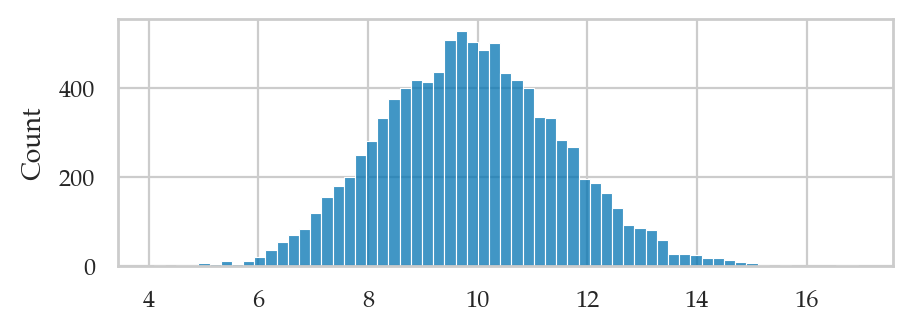

In [11]:
from scipy.stats import norm
muK = 1000
sigmaK = 10
rvK = norm(muK, sigmaK)

from stats_helpers import gen_sampling_dist
kstds20 = gen_sampling_dist(rvK, estfunc=std, n=20, N=10000)

sns.histplot(kstds20)

### Exercise 3.5

Generate the sampling distributions of the estimator `mean` for samples of size $n=10$ , $n=30$ , and $n=100$ from the kombucha population `rvK`  $= K \sim \mathcal{N}(1000,10)$ .
Plot a histogram for each.
Plot also the probability density function of the normal approximations
predicted by the central limit theorem for each case.

Hint: Code block XX shows an example of a combined plot a histogram and the probability density function on the same axis.

In [12]:
from scipy.stats import norm
muK = 1000
sigmaK = 10
rvK = norm(muK, sigmaK)

# simulations of Xbar for different sample sizes:
xbars10 = gen_sampling_dist(rvK, estfunc=mean, n=10)
xbars30 = gen_sampling_dist(rvK, estfunc=mean, n=30)
xbars100 = gen_sampling_dist(rvK, estfunc=mean, n=100)

<AxesSubplot: xlabel='x', ylabel='$f_{X}$'>

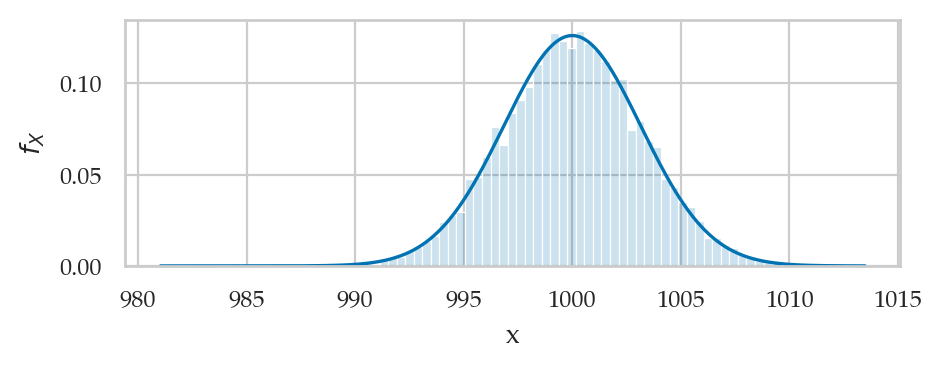

In [13]:
# CASE n = 10

# Plot the histogram obtained from simulation
ax = sns.histplot(xbars10, stat="density", alpha=0.2)

# Find the CLT approximation
seKbar10 = sigmaK / np.sqrt(10)
rvKbarCLT10 = norm(muK, seKbar10)

# Plot the pdf of the CLT approximation
from plot_helpers import plot_pdf
plot_pdf(rvKbarCLT10, ax=ax)

<AxesSubplot: xlabel='x', ylabel='$f_{X}$'>

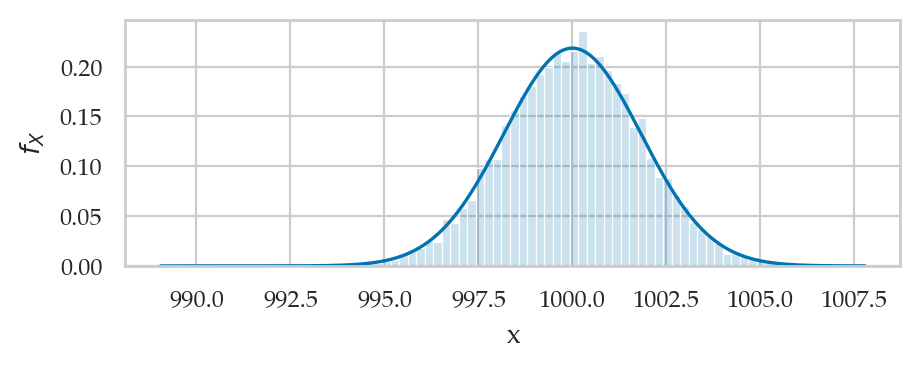

In [14]:
# CASE n = 30

# Plot the histogram obtained from simulation
ax = sns.histplot(xbars30, stat="density", alpha=0.2)

# Find the CLT approximation
seKbar30 = sigmaK / np.sqrt(30)
rvKbarCLT30 = norm(muK, seKbar30)

# Plot the pdf of the CLT approximation
plot_pdf(rvKbarCLT30, ax=ax)

<AxesSubplot: xlabel='x', ylabel='$f_{X}$'>

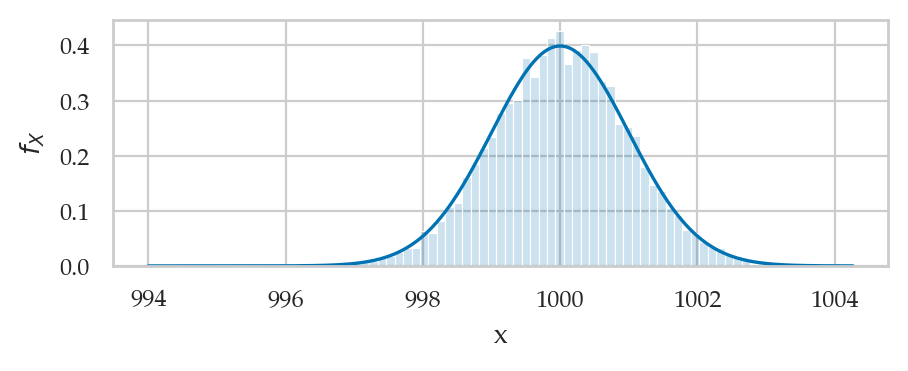

In [15]:
# CASE n = 100

# Plot the histogram obtained from simulation
ax = sns.histplot(xbars100, stat="density", alpha=0.2)

# Find the CLT approximation
seKbar100 = sigmaK / np.sqrt(100)
rvKbarCLT100 = norm(muK, seKbar100)

# Plot the pdf of the CLT approximation
plot_pdf(rvKbarCLT100, ax=ax)

### Exercise 3.6

Generate sampling distribution of the sample mean for samples of size $n=30$ from the standard uniform model `rvU`  $= U \sim \mathcal{U}(0,1)$ .
Plot a histogram.
Compare your result with Figure~ \ref{fig:sampling_dist_of_Ubar} on page \pageref{fig:sampling_dist_of_Ubar} .
Plot the prediction of the central limit theorem on the same axis.

In [16]:
from scipy.stats import uniform
rvU = uniform(0,1)

# the mean and standard deviation of the pupulation are
muU = rvU.mean()
sigmaU = rvU.std()
muU, sigmaU

(0.5, 0.28867513459481287)

<AxesSubplot: xlabel='x', ylabel='$f_{X}$'>

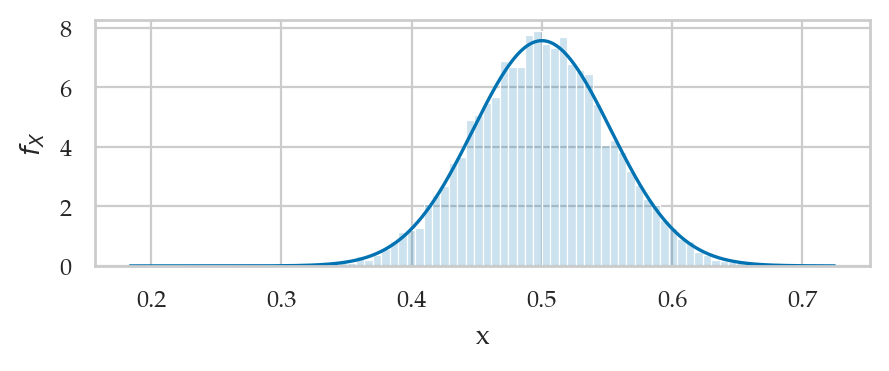

In [17]:
# simulations of Ubar for samples of size 30
ubars30 = gen_sampling_dist(rvU, estfunc=mean, n=30)

# Plot the histogram obtained from simulation
ax = sns.histplot(ubars30, stat="density", alpha=0.2)

# Find the CLT approximation
seUbar30 = sigmaU / np.sqrt(30)
rvUbarCLT30 = norm(muU, seUbar30)

# Plot the pdf of the CLT approximation
plot_pdf(rvUbarCLT30, ax=ax)

## Exercises 3


### Exercise 3.7

Use the bootstrap procedure to obtain approximations to the sampling distribution of the mean
from the sample of apple weights in the dataset `datasets/apples.csv` .
Based on your result,
what can you say about the unknown population mean $\mu_A$ ?

In [18]:
apples = pd.read_csv("datasets/apples.csv")
asample = apples["weight"]
# apples

<AxesSubplot: ylabel='Density'>

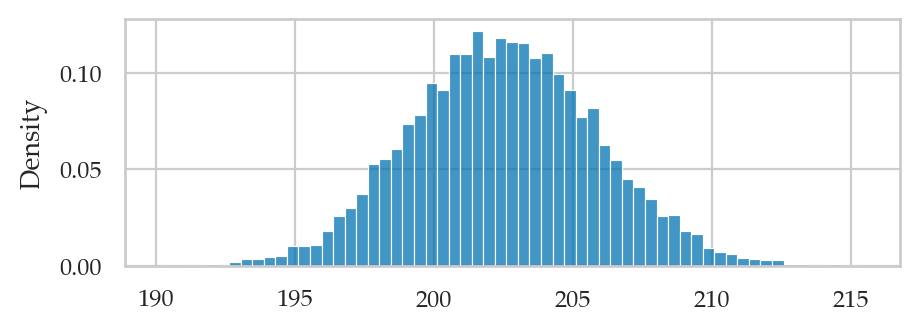

In [19]:
from stats_helpers import gen_boot_dist

abars_boot = gen_boot_dist(asample, estfunc=mean)

sns.histplot(abars_boot, stat="density")

In [20]:
np.mean(abars_boot), np.std(abars_boot)

(202.51608000000002, 3.359181661297882)

Based on the data in `asample`,
the unknown mean of the apples population is roughly $\mu_A \approx \overline{\mathbf{a}} = 202.5$,
and the standard deviation of this estimate about the mean 
is given by the estimate standard error $\stderr{\overline{\mathbf{a}}} = 3.36$.

### Exercise 3.8

Compute bootstrap distribution for the sample mean from Batch 04 of the kombucha dataset,
and plot a histogram.
Do you think Batch 04 is a regular batch or an irregular batch of production?

In [21]:
kombucha = pd.read_csv("datasets/kombucha.csv")
ksample04 = kombucha[kombucha["batch"]==4]["volume"]
mean(ksample04)

1003.8335

The mean of computed from the sample 04 is $\overline{\mathbf{x}}_{04} = 1003.8335$,
which is higher than expected from a regular batch ($\mu_K = 1000$).

<AxesSubplot: ylabel='Density'>

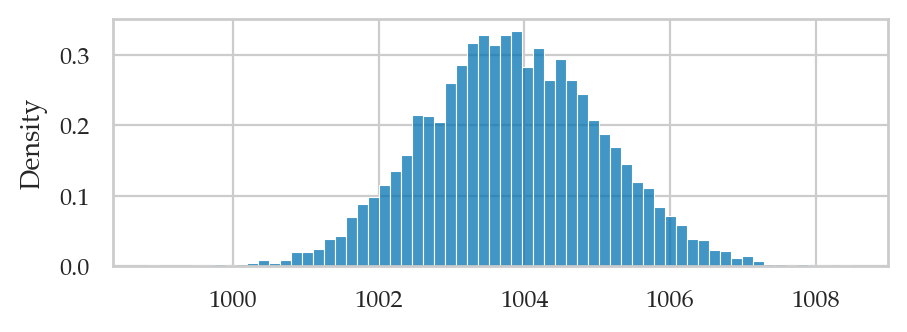

In [22]:
kbars04_boot = gen_boot_dist(ksample04, estfunc=mean)
sns.histplot(kbars04_boot, stat="density")

Even when we take into account of the possible variability
in the estimate $\overline{\mathbf{x}}_{04}$
we see that the we're still very far from the expected mean $\mu_K = 1000$.

This means the Batch 04 is likely not regular batch:
the volume in this batch is higher than expected for regular batches $\mu_K = 1000$.

## Exercises 4


### Exercise 3.9

Describe your uncertainty about the unknown population mean $\mu_A$ based on sample of apple weights from the dataset `datasets/apples.csv`:  
**a)** find an analytical formula in terms Student's $t$ -distribution,  
**b)** use bootstrap estimation,  
**c)** compare your answers from part a) and b) graphically.

In [23]:
apples = pd.read_csv("datasets/apples.csv")
asample = apples["weight"]
# apples

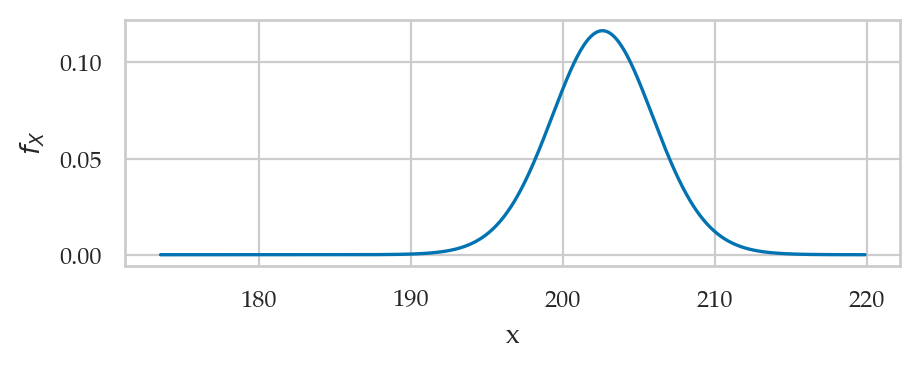

In [24]:
# a) Find the CLT approximation
from scipy.stats import t as tdist

n = asample.count()
df = n-1
loc = mean(asample)
scale = std(asample) / np.sqrt(30)
rvTAbar = tdist(df, loc=loc, scale=scale)

# Plot the pdf of the CLT approximation
ax = plot_pdf(rvTAbar)

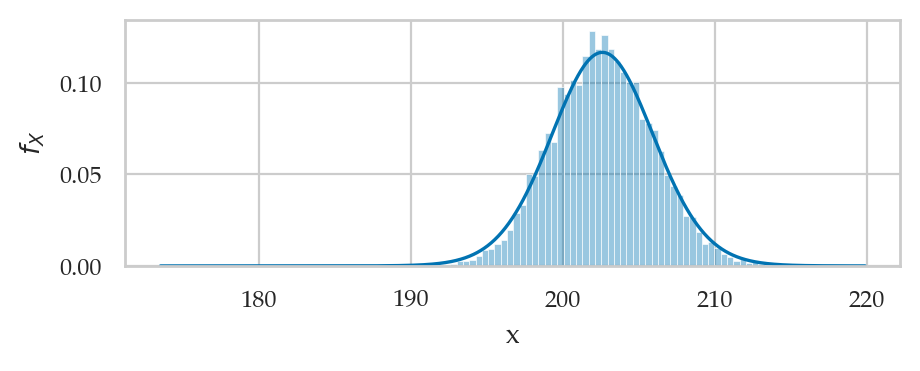

In [25]:
# b) obtain bootstrap approximation
abars_boot = gen_boot_dist(asample, estfunc=mean)
sns.histplot(abars_boot, stat="density", ax=ax, alpha=0.4)
ax.figure

## Exercises 5


### Exercise 3.10

Under regular operations,
the kombucha volume is described by the model `rvK`  $= K \sim \mathcal{N}(1000,10)$ .  
**a)** Plot the probability density function for the sampling distribution of the variance for samples of size $n=40$ from the population $K$ .  
**b)** Compute the sample variance of Batch 08 from the kombucha dataset.  
**c)** Compare the observed value in b) to the sampling distribution in a).
Does it look like this is a regular batch or irregular batch?

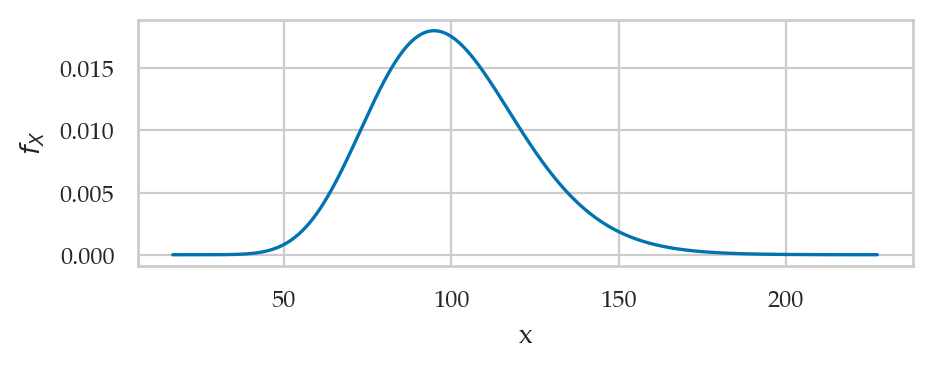

In [26]:
# a) Find the sampling distribution of the sample variance
from scipy.stats import chi2

n = 40
df = n - 1
scale = sigmaK**2 / (n-1)
rvS2 = chi2(df, loc=0, scale=scale)

# Plot the pdf of the CLT approximation
ax = plot_pdf(rvS2)

In [27]:
# b) the sample variance of Batch 04 is
kombucha = pd.read_csv("datasets/kombucha.csv")
ksample08 = kombucha[kombucha["batch"]==8]["volume"]
var(ksample08)

169.9979220512824

c) The observed value $s_{\mathbf{k}_{08}} = 167$ is very unlikely to occur
under the expected sampling distribution for the sample variance
for regular samples.
This suggests that Batch 08 is an irregular batch with abnormally high variance.
Better check the machine.

### Exercise 3.11

Compute the bootstrap approximation for sampling distribution of the variance
from Batch 08 of the kombucha dataset.
Plot a histogram.

<AxesSubplot: ylabel='Density'>

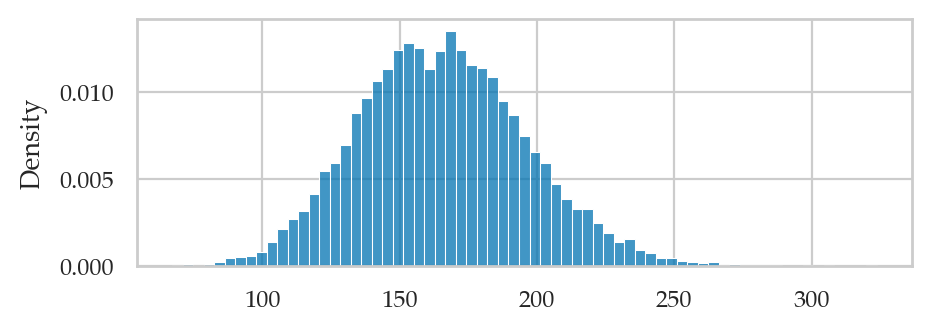

In [28]:
kombucha = pd.read_csv("datasets/kombucha.csv")
ksample08 = kombucha[kombucha["batch"]==8]["volume"]

kvars08_boot = gen_boot_dist(ksample08, estfunc=var)

sns.histplot(kvars08_boot, stat="density")

The boostrap etimates we obverve are very far from the 
expected standard deviation for regular batches,
which is $\sigma_K^2 = 100$,
which tells us Batch 08 might be irregular (abnormally high variance).

## Exercises 6


### Exercise 3.12

Describe the uncertainty about the difference between means `dmeans(scoresR,scoresU)` ,
where `scoresR` and `scoresU` are sleep scores of the rural and urban doctors
from the doctors dataset `datasets/apples.csv` .  
**a)** Find an analytical formula in terms Student's $t$ -distribution.  
**b)** Use bootstrap estimation.  
**c)** Compare your answers from part a) and b) graphically.

In [29]:
doctors = pd.read_csv("datasets/doctors.csv")
scoresR = doctors[doctors["location"]=="rural"]["score"]
scoresU = doctors[doctors["location"]=="urban"]["score"]

# observed value
dscores = dmeans(scoresR,scoresU)
dscores

2.2236048265460084

In [30]:
# a) analytical approximation

# obtain the sample sizes and stds of the two groups
nR = scoresR.count()
stdR = scoresR.std()
nU = scoresU.count()
stdU = scoresU.std()

# standard error of the difference between group means
seDhatscores = np.sqrt(stdU**2/nU + stdR**2/nR)
print("Estimated sample standard error", seDhatscores)

# calculate the degrees of freedom
from stats_helpers import calcdf
df = calcdf(stdU, nU, stdR, nR)

# probability model based on Student's t-distribution
from scipy.stats import t as tdist
rvDscores = tdist(df, loc=dscores, scale=seDhatscores)

Estimated sample standard error 0.878593324218042


In [31]:
# b) bootstrap estimate
# compute bootstrap estimates for mean in each group
meanR_boot = gen_boot_dist(scoresR, estfunc=mean)
meanU_boot = gen_boot_dist(scoresU, estfunc=mean)

# compute the difference between means from bootstrap samples
dmeans_boot = []
for bmeanR, bmeanU in zip(meanR_boot, meanU_boot):
    d_boot = bmeanR - bmeanU
    dmeans_boot.append(d_boot)

# show first of the 5 boostrap estimate sin the list of N=10000
# dmeans_boot[0:5]

<AxesSubplot: xlabel='d', ylabel='$f_{D}$'>

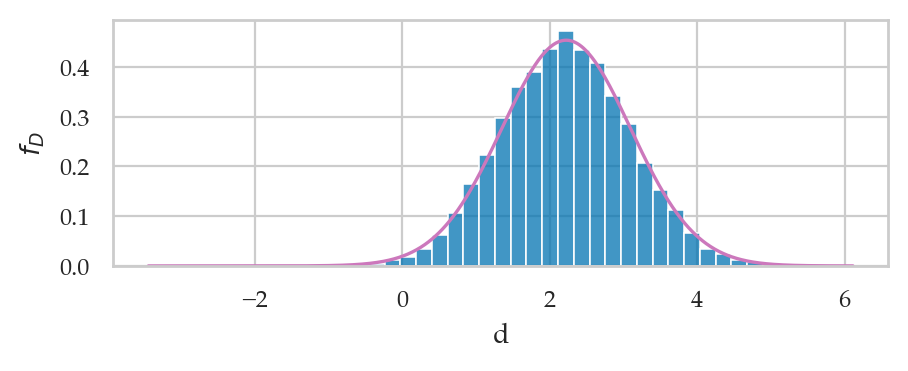

In [32]:
# c) plot the answers form a) and b)

# pdf of the analytical approximation 
ax = plot_pdf(rvDscores, rv_name="D", color=purple)

# histogtam of the bootstrap approximation
sns.histplot(dmeans_boot, ax=ax, stat="density", bins=30)

## Exercises 7


### Exercise 3.13

Generate the sampling distribution of the median for samples of size $n=30$ from the population `rvK` $= K \sim \mathcal{N}(1000,10)$ .

<AxesSubplot: ylabel='Density'>

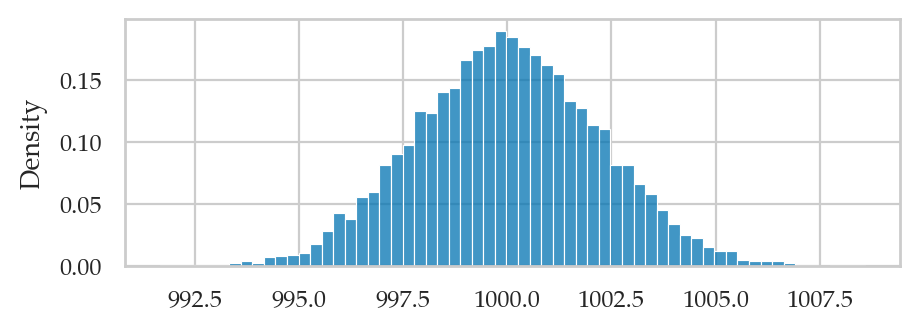

In [33]:
from scipy.stats import norm
rvK = norm(1000, 10)

# simulations of the median from samples of size n=30
kmedians30 = gen_sampling_dist(rvK, estfunc=np.median, n=30)
sns.histplot(kmedians30, stat="density")

In [34]:
# sehat_median
np.std(kmedians30)

2.2070810518584425

### Exercise 3.14

Generate the sampling distribution of `P90` , the 90th percentile estimator,
from samples of size $n=30$ from `rvK`  $= K \sim \mathcal{N}(1000,10)$ .
Calculate the standard error $\stderr{\tt{P90}}$ of the estimator.

<AxesSubplot: ylabel='Density'>

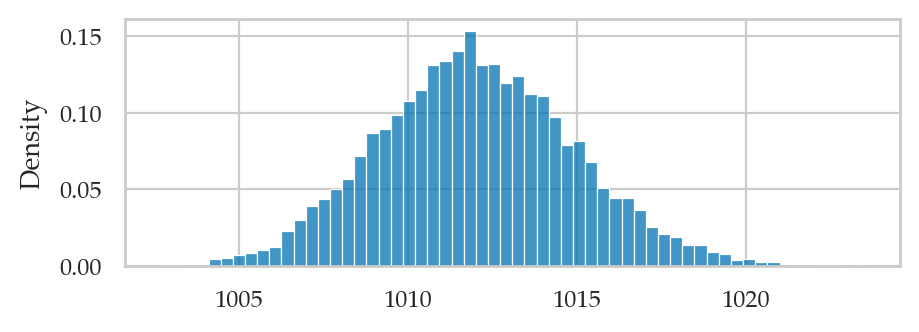

In [35]:
from scipy.stats import norm
rvK = norm(1000, 10)

# 90th percential estimator function
def p90(sample):
    return np.percentile(sample, 90)

# simulations of p90 from samples of size n=30
kp90s30 = gen_sampling_dist(rvK, estfunc=p90, n=30)
sns.histplot(kp90s30, stat="density")

In [36]:
# sehat_p90
np.std(kp90s30)

2.919864909619502